In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = "../"

## Topologies

In [2]:
def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";")
    display(HTML(df.to_html()))
        
read_topology("multi")
read_topology("single")

Topology name: multi


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,32,3.20,2048,1,256,32
1,B01,B01,48,2.93,1256,6,64,8
2,C01,C01,32,3.20,2048,2,128,16


Topology name: single


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,8,3.2,128,1,128,8


## Traces

In [2]:
df_trace = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/trace.parquet")
df_trace.head()

,id,timestamp,duration,cpu_count,cpu_usage
0,1019,2013-08-12 13:40:46+00:00,300000,1,0.000000
1,1019,2013-08-12 13:45:46+00:00,300000,1,11.703998
2,1019,2013-08-12 13:55:46+00:00,600000,1,0.000000
3,1019,2013-08-12 14:00:46+00:00,300000,1,11.703998
4,1019,2013-08-12 14:15:46+00:00,900000,1,0.000000


In [10]:
df_meta = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/meta.parquet")
df_meta.head()

,id,start_time,stop_time,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2926.000135,181352
1,1023,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999560,260096
2,1026,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999717,249972
3,1052,2013-08-29 14:38:12+00:00,2013-09-05 07:09:07+00:00,1,2926.000107,131245
4,1073,2013-08-21 11:07:12+00:00,2013-09-11 13:39:58+00:00,1,2599.999649,179306


# Lets run this in OpenDC!

## Resulting Files

In [2]:
output_folder = f"{base_folder}output"
workload = "workload=bitbrains-small"
seed = "seed=1"

df_host_single = pd.read_parquet(f"{output_folder}/with-net-new-new/raw-output/0/{seed}/host.parquet")
# df_host_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/host.parquet")

df_server_single = pd.read_parquet(f"{output_folder}/with-net-new-new/raw-output/0/{seed}/server.parquet")
# df_server_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/server.parquet")

df_service_single = pd.read_parquet(f"{output_folder}/with-net-new-new/raw-output/0/{seed}/service.parquet")
# df_service_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/service.parquet")

# def add_absolute_timestamp(df, start_dt):
#     df["absolute_timestamp"] = start_dt + (df["timestamp"] - df["timestamp"].min())

# add_absolute_timestamp(df_host_single, df_meta["start_time"].min())
# add_absolute_timestamp(df_host_single, df_meta["start_time"].min())

# add_absolute_timestamp(df_server_single, df_meta["start_time"].min())
# add_absolute_timestamp(df_server_multi, df_meta["start_time"].min())

# add_absolute_timestamp(df_service_single, df_meta["start_time"].min())
# add_absolute_timestamp(df_service_multi, df_meta["start_time"].min())

In [3]:
df_host_single = pd.read_parquet(f"{output_folder}/with-net-new-new/raw-output/0/{seed}/host.parquet")
df_host_single

,timestamp,timestamp_absolute,host_id,host_name,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,...,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,carbon_intensity,carbon_emission,uptime,downtime,boot_time,boot_time_absolute
0,300000,1376314846000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,7,0,0,...,5,0,200.375854,60112.955856,0.0,0.0,300000,0,1376314546000,NaN
1,600000,1376315146000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,7,0,0,...,0,0,200.697541,60209.262443,0.0,0.0,300000,0,1376314546000,NaN
2,900000,1376315446000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,7,0,0,...,0,0,200.460500,60138.149947,0.0,0.0,300000,0,1376314546000,NaN
3,1200000,1376315746000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,7,0,0,...,0,0,200.558729,60167.618680,0.0,0.0,300000,0,1376314546000,NaN
4,1500000,1376316046000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,7,0,0,...,0,0,200.595958,60178.787398,0.0,0.0,300000,0,1376314546000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185025,55507800000,1431822346000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,1,0,0,...,0,0,200.000253,60015.986069,0.0,0.0,300000,0,1376314546000,NaN
185026,55508100000,1431822646000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,1,0,0,...,0,0,200.000253,60000.075947,0.0,0.0,300000,0,1376314546000,NaN
185027,55508400000,1431822946000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,1,0,0,...,0,0,200.091691,60011.597071,0.0,0.0,300000,0,1376314546000,NaN
185028,55508700000,1431823246000,bb1ad573-19b8-9cd8-0000-000000000000,H01,1,128000,0,1,0,0,...,0,0,200.000253,60015.986069,0.0,0.0,300000,0,1376314546000,NaN


In [4]:
pd.Timedelta(300000, unit="ms")

Timedelta('0 days 00:05:00')

In [6]:
df_host_single.timestamp.to_pytimedelta()

AttributeError: 'Series' object has no attribute 'to_pytimedelta'

In [5]:
df_host_single.timestamp

0              300000
1              600000
2              900000
3             1200000
4             1500000
             ...     
185025    55507800000
185026    55508100000
185027    55508400000
185028    55508700000
185029    55508874000
Name: timestamp, Length: 185030, dtype: int64

In [6]:
df_service_single.timestamp.value_counts()

timestamp
300000         1
37004100000    1
37004700000    1
37005000000    1
37005300000    1
              ..
18503700000    1
18504000000    1
18504300000    1
18504600000    1
55508874000    1
Name: count, Length: 185030, dtype: int64

In [7]:
(df_service_single.servers_active + df_service_single.servers_pending).unique() 

array([44, 45, 46, 47, 48, 49, 50, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       31, 29, 27, 25, 24, 23, 22, 19, 18, 17, 16, 15, 14, 13, 12, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int32)

In [29]:
set(d1) == set(d2)

NameError: name 'd1' is not defined

## Power Usage

In [8]:
print(f"single topology:  {df_host_single.energy_usage.sum()}")
# print(f"multi topology:   {df_host_multi.power_total.sum()}")

single topology:  12682436711.55545


## CPU usage

In [9]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
# print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

single topology:  0.017797920412917976


## CPU utilization

In [10]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
# print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

single topology:  0.017797920412917976


## Plotting Results

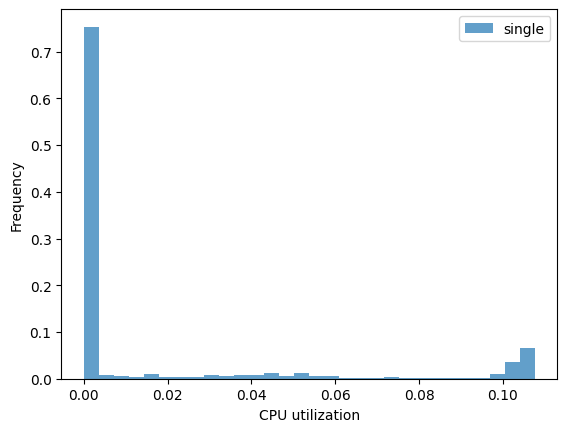

In [11]:
# data = df_host_multi.cpu_utilization
# plt.hist(data, weights=np.ones_like(data) / len(data),
#          alpha=0.7, label="multi", bins=30)


data = df_host_single.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="single", bins=30)

plt.xlabel("CPU utilization")
plt.ylabel("Frequency")
plt.legend()
plt.show()

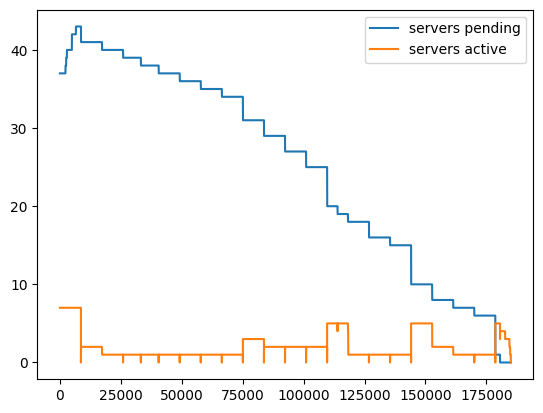

In [12]:
import matplotlib.pyplot as plt

plt.plot(df_service_single.servers_pending, label="servers pending")
plt.plot(df_service_single.servers_active, label="servers active")

plt.legend()

In [54]:
import matplotlib.pyplot as plt

plt.plot(df_service_multi.servers_pending, label="servers pending")
plt.plot(df_service_multi.servers_active, label="servers active")

plt.legend()

NameError: name 'df_service_multi' is not defined

In [156]:
df_server_single.head()

,timestamp,server_id,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,absolute_timestamp
0,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x06\xc4]\x1...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,181,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
1,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x1b9\x89jQ\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,260,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
2,1970-01-01 00:05:00+00:00,"b'\x00\x00\x00\x00\x00\x00\x00\x00,\x82\x9a\xb...",b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,250,1,25600.0,2,2622,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
3,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00>\xe5x\x90A\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,125,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
4,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00e~\xec\xdd<\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,157,1,25600.0,2,2951,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00


In [14]:
utilization = df_host_single.cpu_utilization.to_numpy()

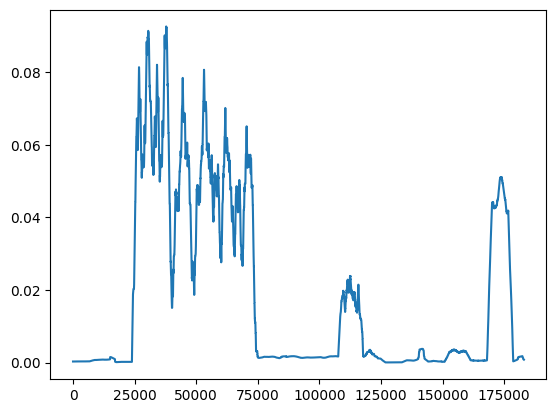

In [15]:
window = 2000
avg_utilization = []

for ind in range(len(utilization) - window + 1):
    avg_utilization.append(np.mean(utilization[ind:ind+window]))
    
plt.plot(avg_utilization)

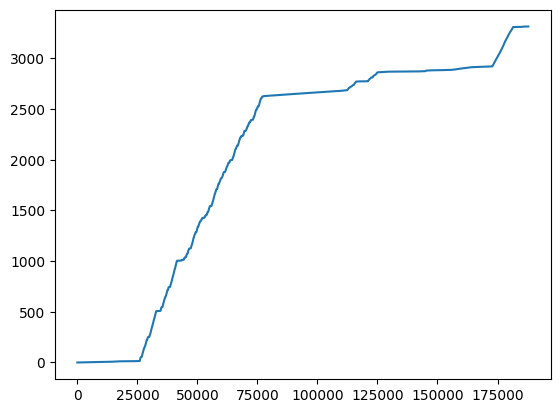

In [57]:
sum_util = []

last_util = 0
for util in utilization:
    sum_util.append(util + last_util)
    last_util = sum_util[-1]
    
plt.plot(sum_util)

In [58]:
output_file = "../Python_scripts/meta_small.parquet"
output_file_path = Path(output_file)

df_meta_new.to_parquet(output_file_path, index=False)

output_file = "../Python_scripts/trace_small.parquet"
output_file_path = Path(output_file)
df_trace_new.to_parquet(output_file_path, index=False)

NameError: name 'Path' is not defined